## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512,activation='relu')(input_layer)
    x = keras.layers.Dense(units=256,activation='relu')(x)
    x = keras.layers.Dense(units=128,activation='relu')(x)
    out = keras.layers.Dense(units=10,activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 253us/step - loss: 2.2633 - acc: 0.1728 - val_loss: 2.2186 - val_acc: 0.2056
Epoch 2/500
50000/50000 [==============================] - 13s 251us/step - loss: 2.1905 - acc: 0.2265 - val_loss: 2.1634 - val_acc: 0.2359
Epoch 3/500
50000/50000 [==============================] - 14s 287us/step - loss: 2.1396 - acc: 0.2483 - val_loss: 2.1164 - val_acc: 0.2530
Epoch 4/500
50000/50000 [==============================] - 15s 300us/step - loss: 2.0957 - acc: 0.2659 - val_loss: 2.0768 - val_acc: 0.2675
Epoch 5/500
50000/50000 [==============================] - 14s 279us/step - loss: 2.0589 - acc: 0.2774 - val_loss: 2.0428 - val_acc: 0.2829
Epoch 6/500
50000/50000 [==============================] - 14s 275us/step - loss: 2.0268 - acc: 0.2897 - val_loss: 2.0131 - val_acc: 0.2903
Epoch 7/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.9995 - acc: 0.2994 - val_l

50000/50000 [==============================] - 6s 124us/step - loss: 1.6662 - acc: 0.4218 - val_loss: 1.6683 - val_acc: 0.4218
Epoch 60/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6632 - acc: 0.4227 - val_loss: 1.6661 - val_acc: 0.4224
Epoch 61/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.6601 - acc: 0.4241 - val_loss: 1.6630 - val_acc: 0.4227
Epoch 62/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.6572 - acc: 0.4239 - val_loss: 1.6598 - val_acc: 0.4212
Epoch 63/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6542 - acc: 0.4257 - val_loss: 1.6577 - val_acc: 0.4241
Epoch 64/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.6515 - acc: 0.4259 - val_loss: 1.6559 - val_acc: 0.4235
Epoch 65/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.6487 - acc: 0.4273 - val_loss: 1.6516 - val_acc: 0.4248
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 1.5292 - acc: 0.4677 - val_loss: 1.5478 - val_acc: 0.4568
Epoch 118/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5270 - acc: 0.4695 - val_loss: 1.5471 - val_acc: 0.4567
Epoch 119/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5252 - acc: 0.4696 - val_loss: 1.5495 - val_acc: 0.4555
Epoch 120/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5233 - acc: 0.4706 - val_loss: 1.5492 - val_acc: 0.4584
Epoch 121/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5213 - acc: 0.4715 - val_loss: 1.5431 - val_acc: 0.4583
Epoch 122/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5196 - acc: 0.4706 - val_loss: 1.5457 - val_acc: 0.4601
Epoch 123/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.5181 - acc: 0.4728 - val_loss: 1.5413 - val_acc: 0.4591
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 1.4329 - acc: 0.4994 - val_loss: 1.4770 - val_acc: 0.4779
Epoch 176/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4315 - acc: 0.4997 - val_loss: 1.4812 - val_acc: 0.4762
Epoch 177/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.4299 - acc: 0.5010 - val_loss: 1.4773 - val_acc: 0.4807
Epoch 178/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.4286 - acc: 0.5012 - val_loss: 1.4744 - val_acc: 0.4807
Epoch 179/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.4271 - acc: 0.5015 - val_loss: 1.4764 - val_acc: 0.4784
Epoch 180/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.4259 - acc: 0.5016 - val_loss: 1.4714 - val_acc: 0.4798
Epoch 181/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4246 - acc: 0.5034 - val_loss: 1.4694 - val_acc: 0.4803
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 119us/step - loss: 1.3537 - acc: 0.5272 - val_loss: 1.4257 - val_acc: 0.4974
Epoch 234/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.3528 - acc: 0.5273 - val_loss: 1.4261 - val_acc: 0.4968
Epoch 235/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3510 - acc: 0.5284 - val_loss: 1.4345 - val_acc: 0.4937
Epoch 236/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3503 - acc: 0.5275 - val_loss: 1.4348 - val_acc: 0.4968
Epoch 237/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3488 - acc: 0.5294 - val_loss: 1.4242 - val_acc: 0.4952
Epoch 238/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3473 - acc: 0.5287 - val_loss: 1.4287 - val_acc: 0.4982
Epoch 239/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3464 - acc: 0.5296 - val_loss: 1.4220 - val_acc: 0.4992
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 118us/step - loss: 1.2828 - acc: 0.5523 - val_loss: 1.4037 - val_acc: 0.5017
Epoch 292/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.2825 - acc: 0.5524 - val_loss: 1.3953 - val_acc: 0.5028
Epoch 293/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2806 - acc: 0.5538 - val_loss: 1.4034 - val_acc: 0.5009
Epoch 294/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2800 - acc: 0.5540 - val_loss: 1.3877 - val_acc: 0.5105
Epoch 295/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2786 - acc: 0.5540 - val_loss: 1.3932 - val_acc: 0.5091
Epoch 296/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2767 - acc: 0.5548 - val_loss: 1.3877 - val_acc: 0.5054
Epoch 297/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2751 - acc: 0.5556 - val_loss: 1.4108 - val_acc: 0.5039
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 9s 172us/step - loss: 1.2175 - acc: 0.5760 - val_loss: 1.3640 - val_acc: 0.5129
Epoch 350/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2164 - acc: 0.5764 - val_loss: 1.4111 - val_acc: 0.5043
Epoch 351/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.2151 - acc: 0.5772 - val_loss: 1.3782 - val_acc: 0.5122
Epoch 352/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.2129 - acc: 0.5764 - val_loss: 1.3721 - val_acc: 0.5153
Epoch 353/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2130 - acc: 0.5780 - val_loss: 1.3609 - val_acc: 0.5183
Epoch 354/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.2114 - acc: 0.5781 - val_loss: 1.3650 - val_acc: 0.5160
Epoch 355/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.2102 - acc: 0.5788 - val_loss: 1.3566 - val_acc: 0.5189
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 1.1540 - acc: 0.5978 - val_loss: 1.3580 - val_acc: 0.5194
Epoch 408/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.1534 - acc: 0.5981 - val_loss: 1.3665 - val_acc: 0.5174
Epoch 409/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1525 - acc: 0.5991 - val_loss: 1.3388 - val_acc: 0.5238
Epoch 410/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1503 - acc: 0.5997 - val_loss: 1.3457 - val_acc: 0.5229
Epoch 411/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.1502 - acc: 0.5983 - val_loss: 1.3599 - val_acc: 0.5227
Epoch 412/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1487 - acc: 0.5982 - val_loss: 1.3615 - val_acc: 0.5210
Epoch 413/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.1479 - acc: 0.6001 - val_loss: 1.3630 - val_acc: 0.5138
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 123us/step - loss: 1.0944 - acc: 0.6188 - val_loss: 1.3662 - val_acc: 0.5155
Epoch 466/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0955 - acc: 0.6187 - val_loss: 1.3483 - val_acc: 0.5233
Epoch 467/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.0925 - acc: 0.6190 - val_loss: 1.3579 - val_acc: 0.5209
Epoch 468/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.0919 - acc: 0.6190 - val_loss: 1.3831 - val_acc: 0.5135
Epoch 469/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.0910 - acc: 0.6198 - val_loss: 1.3526 - val_acc: 0.5259
Epoch 470/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0892 - acc: 0.6198 - val_loss: 1.3747 - val_acc: 0.5103
Epoch 471/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0885 - acc: 0.6210 - val_loss: 1.3483 - val_acc: 0.5203
Epoch 472/500
50000/50000 [

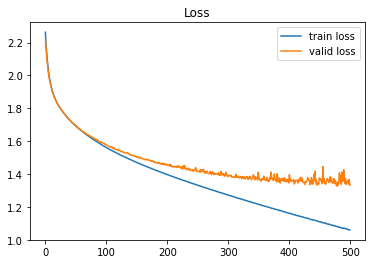

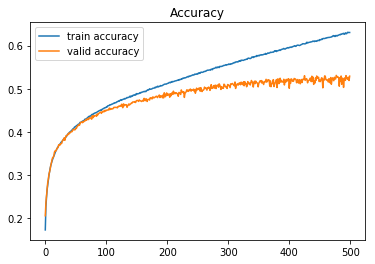

In [10]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()